# calculate overview

In [7]:
from IPython import display

In [2]:
imgsize = 1550 # microns

In [3]:
fielddist = imgsize * 0.90 # overlap
fielddist

1395.0

In [4]:
resolution = 256

In [5]:
precision = (imgsize) // resolution # integer devision, in microns
display.Math(str(precision) + '\mu m') 

<IPython.core.display.Math object>

In [6]:
xmin = 56.00 # mm
ymin = 30.30
xmax = 78.76
ymax = 43.26

In [7]:
dx = xmax-xmin
dy = ymax-ymin
dx, dy

(22.760000000000005, 12.959999999999997)

In [8]:
xsize = dx + imgsize/1000
ysize = dy + imgsize/1000
xsize, ysize

(24.310000000000006, 14.509999999999998)

In [9]:
xfields = round(xsize*1000 / fielddist)
yfields = round(ysize*1000 / fielddist)
xfields, yfields

(17, 10)

In [10]:
# start
xstart = (xmin - (xsize - dx) / 2) * 1000
ystart = (ymin - (ysize - dy) / 2) * 1000
xstart, ystart

(55225.0, 29525.0)

# scan overview

In [2]:
from leicaautomator.automator import find_spots
from leicaautomator.utils import save_regions, flatten
from leicaexperiment import Experiment
from leicascanningtemplate import ScanningTemplate
from leicacam import CAM

In [12]:
cam = CAM()
cam.welcome_msg

b'Welcome client : 7\n'

In [ ]:
tmpl_path = r"C:\Users\TCS-User\AppData\Roaming\Leica Microsystems\LAS X\MatrixScreener\ScanningTemplates\ ".strip()
tmpl_name = '{ScanningTemplate}leicaautomator-overview.xml'
tmpl = ScanningTemplate(tmpl_path + tmpl_name)

In [53]:
tmpl.properties.CountOfScanFieldsX = xfields
tmpl.properties.CountOfScanFieldsY = yfields
tmpl.properties.ScanFieldStageDistanceX = fielddist
tmpl.properties.ScanFieldStageDistanceY = fielddist

In [54]:
tmpl.well(1,1).attrib['WellX'] = '2'

for f in tmpl.fields:
    f.attrib['WellX'] = '2'

tmpl.add_well(1, 1, xstart*1e-6, ystart*1e-6)

tmpl.remove_well(2,1)

In [55]:
len(tmpl.fields)

170

In [56]:
tmpl.write()

In [57]:
cam.load_template(tmpl.filename)

[OrderedDict([('cli', 'python-leicacam'), ('app', 'matrix'), ('sys', '0'), ('cmd', 'load'), ('fil', '{ScanningTemplate}leicaautomator-overview')])]

In [49]:
def waitfor(cam, key, value):
    from time import sleep
    scanfinished = False
    while not scanfinished:
        msg = cam.receive()
        for cmd in msg:
            try:
                if cmd[key] == value:
                    scanfinished = True
                    break
            except KeyError:
                continue
        sleep(10e-3)

In [50]:
waitfor(cam, 'cmd', 'load')

In [65]:
cam.start_scan()

[]

In [ ]:
waitfor(cam, 'inf', 'scanfinished')

# rotate images

In [9]:
whole = 'experiment--2015_03_21_17_09_56'
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
experiment = Experiment(exp_path + whole)
!dir $experiment.path

 Volume in drive D is DATADRIVE1
 Volume Serial Number is F805-2E08

 Directory of D:\MatrixScreenerImages\3.3.0_9757\experiment--2015_03_21_17_09_56

03/21/2015  06:10 PM    <DIR>          .
03/21/2015  06:10 PM    <DIR>          ..
03/21/2015  06:10 PM    <DIR>          AdditionalData
03/21/2015  06:09 PM    <DIR>          slide--S00
               0 File(s)              0 bytes
               4 Dir(s)  1,699,973,824,512 bytes free


In [10]:
compressed = experiment.compress(delete_tif=True)
assert len(compressed) == len(experiment.images)

In [11]:
from PIL import Image
for img in experiment.images:
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

In [12]:
stitched = experiment.stitch()[0]

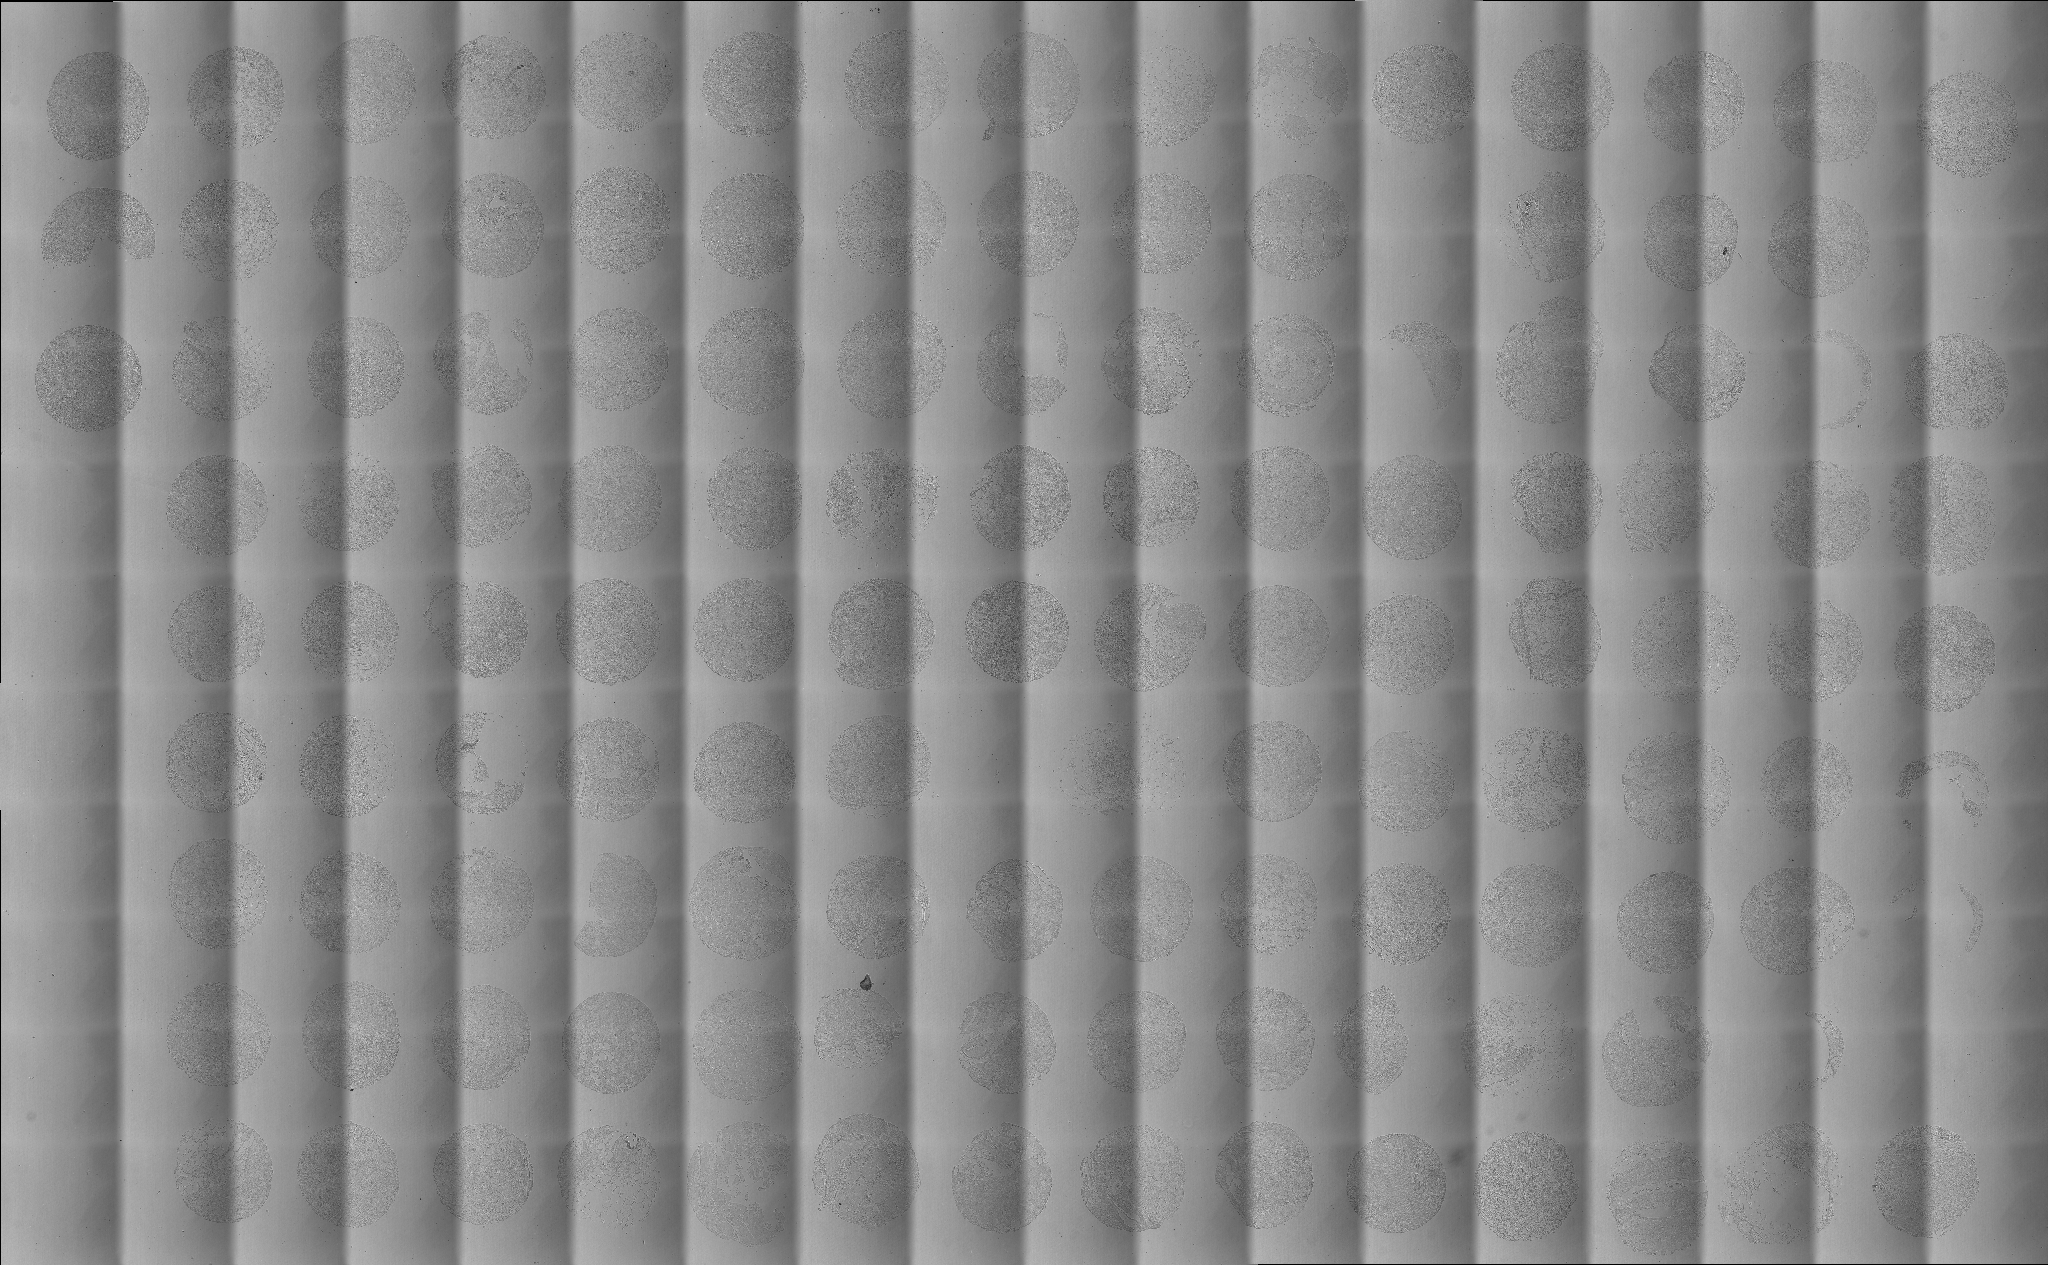

In [13]:
display.Image(stitched, width=1024)

# find regions

In [14]:
regions = find_spots(experiment)

IndexError: index 5062 is out of bounds for axis 0 with size 5062